In [ ]:
from pathlib import PurePath
import kagglehub
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

# Download latest version
path = kagglehub.dataset_download("dharun4772/doordash-eta-prediction")

print("Path to dataset files:", path)

data_file_path = os.path.join(path, 'historical_data.csv')

100%|██████████| 4.99M/4.99M [00:00<00:00, 121MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dharun4772/doordash-eta-prediction/versions/1


In [ ]:
data_file = pd.read_csv(data_file_path)
pd.set_option('display.max_columns', None)
print(data_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [ ]:
data_file.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
data_file.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0
197427,1.0,2015-02-08 19:24:33,2015-02-08 20:01:41,3630,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0,446,134.0


In [ ]:
print(data_file.describe())

           market_id       store_id  order_protocol    total_items  \
count  196441.000000  197428.000000   196433.000000  197428.000000   
mean        2.978706    3530.510272        2.882352       3.196391   
std         1.524867    2053.496711        1.503771       2.666546   
min         1.000000       1.000000        1.000000       1.000000   
25%         2.000000    1686.000000        1.000000       2.000000   
50%         3.000000    3592.000000        3.000000       3.000000   
75%         4.000000    5299.000000        4.000000       4.000000   
max         6.000000    6987.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  197428.000000       197428.000000   197428.000000   197428.000000   
mean     2682.331402            2.670791      686.218470     1159.588630   
std      1823.093688            1.630255      522.038648      558.411377   
min         0.000000            1.000000      -86.000000        0

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64


<Axes: >

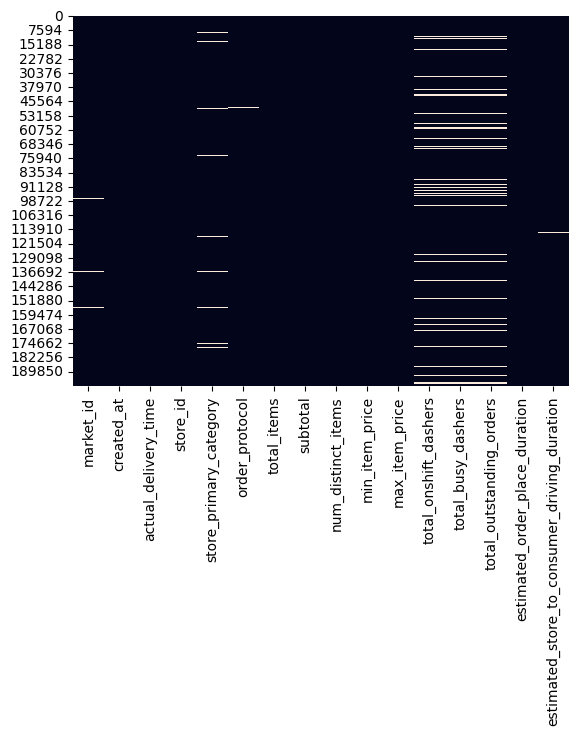

In [ ]:
missing_values = data_file.isnull().sum()
print(missing_values)
sns.heatmap(data_file.isnull(), cbar=False)

In [ ]:
### CLEANING & FEATURE ENGINEERING ###

data_file = data_file[(data_file['min_item_price'] >= 0) &
                      (data_file['total_onshift_dashers'] >= 0) &
                      (data_file['total_busy_dashers'] >= 0)]


data_file = data_file[data_file['subtotal'] > 0]


data_file.dropna(subset=['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'], inplace=True)


data_file['store_primary_category'].fillna('Unknown', inplace=True)


data_file['created_at'] = pd.to_datetime(data_file['created_at'], errors='coerce')
data_file['actual_delivery_time'] = pd.to_datetime(data_file['actual_delivery_time'], errors='coerce')



<ipython-input-7-f272d700b9db>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_file['store_primary_category'].fillna('Unknown', inplace=True)


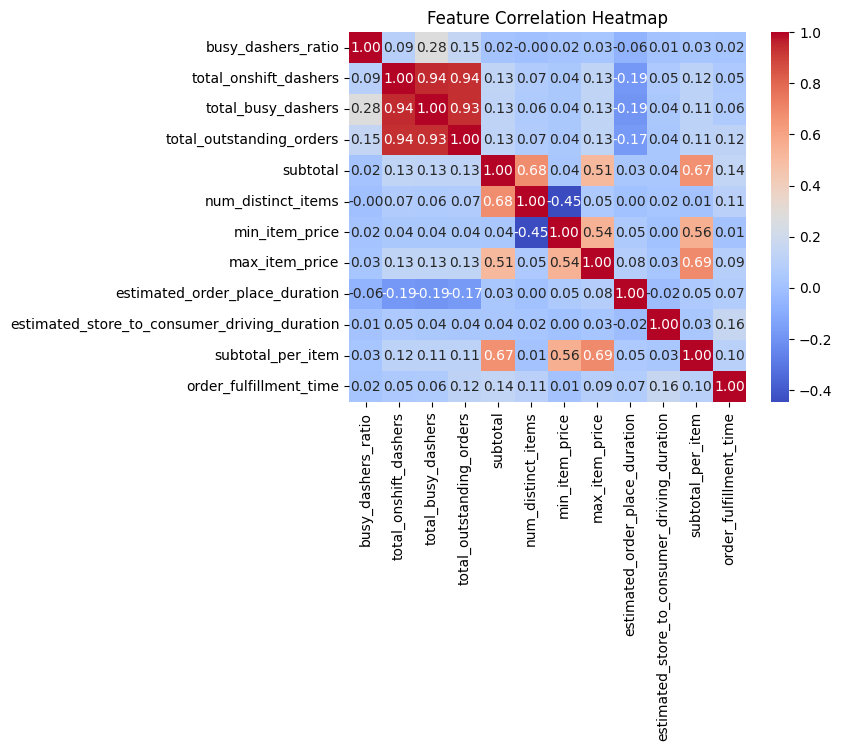

,market_id,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,order_fulfillment_time,busy_dashers_ratio,subtotal_per_item
count,180029.000000,180941,180948.000000,180032.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000,180948.000000
mean,2.748902,2015-02-04 20:20:05.812895232,3545.234614,2.896302,3.208032,2701.038016,2.677692,684.773670,1160.749436,44.819965,41.750254,58.065925,308.839003,545.952761,2866.307990,0.886030,733.220553
min,1.000000,2015-01-21 15:58:11,1.000000,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,101.000000,0.000000,6.000000
25%,2.000000,2015-01-29 02:25:06,1686.000000,1.000000,2.000000,1420.000000,2.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,384.000000,2105.000000,0.771429,494.400000
50%,2.000000,2015-02-05 03:30:19,3614.000000,3.000000,3.000000,2225.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,545.000000,2662.000000,0.916667,666.000000
75%,4.000000,2015-02-12 01:31:05,5323.000000,4.000000,4.000000,3415.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3383.000000,0.981818,892.157143
max,6.000000,2015-02-19 22:45:31,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,373879.000000,29.000000,7350.000000
std,1.331675,NaN,2058.067461,1.515032,2.671361,1828.351517,1.627264,521.198207,561.791702,34.525963,32.143590,52.666346,90.326473,218.290458,1648.029276,0.354039,368.776429


In [ ]:
### CLEANING & FEATURE ENGINEERING ###

cleaned_data = data_file[data_file['total_onshift_dashers'] >= 0].dropna(subset=['total_onshift_dashers', 'created_at'])

cleaned_data.set_index('created_at', inplace=True)

cleaned_data['actual_delivery_time'] = pd.to_datetime(cleaned_data['actual_delivery_time'])
cleaned_data.index = pd.to_datetime(cleaned_data.index)

cleaned_data['order_fulfillment_time'] = (
    cleaned_data['actual_delivery_time'] - cleaned_data.index
).dt.total_seconds()

### RATIO FEATURES ###

cleaned_data['busy_dashers_ratio'] = cleaned_data['total_busy_dashers']/ (cleaned_data['total_onshift_dashers'] + 1)

cleaned_data['subtotal_per_item'] = cleaned_data['subtotal'] / (cleaned_data['num_distinct_items'] + 1)

### OTHER FEATURES



numeric_columns = [
    'busy_dashers_ratio','total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration',
    'subtotal_per_item', 'order_fulfillment_time'
]

cleaned_data.replace([np.inf, -np.inf], np.nan)
cleaned_data[numeric_columns] = cleaned_data[numeric_columns].apply(lambda col: col.fillna(col.mean()), axis=0)

# print(y.head())
# cleaned_data['order_fulfillment_time'].hist(bins=10000)
# plt.title('Distribution of Order Fulfillment Time')
# plt.xlabel('Order Fulfillment Time (seconds)')
# plt.ylabel('Frequency')
# plt.xlim(0,15000)
# plt.show()

sns.heatmap(cleaned_data[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

cleaned_data.describe()

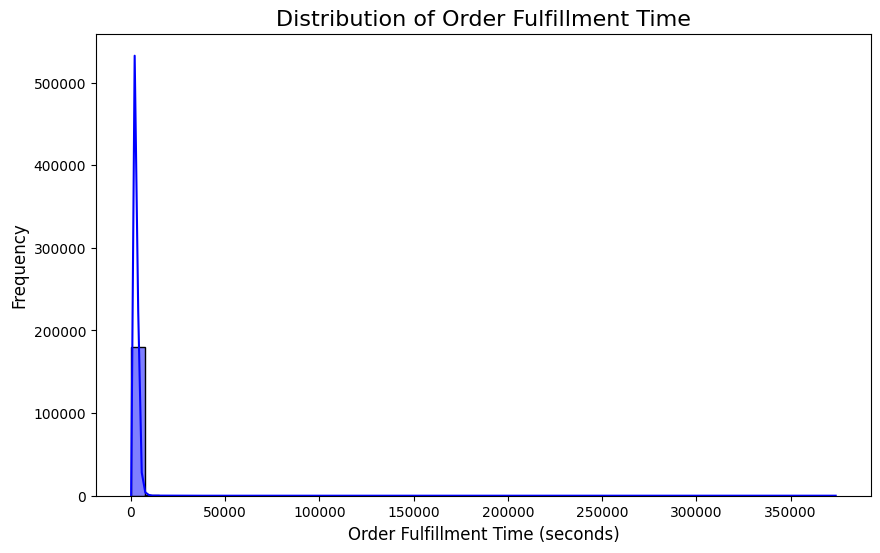

Summary Statistics for Order Fulfillment Time:
count    180948.000000
mean       2866.307990
std        1648.029276
min         101.000000
25%        2105.000000
50%        2662.000000
75%        3383.000000
max      373879.000000
Name: order_fulfillment_time, dtype: float64

Skewness: 108.81550349425123


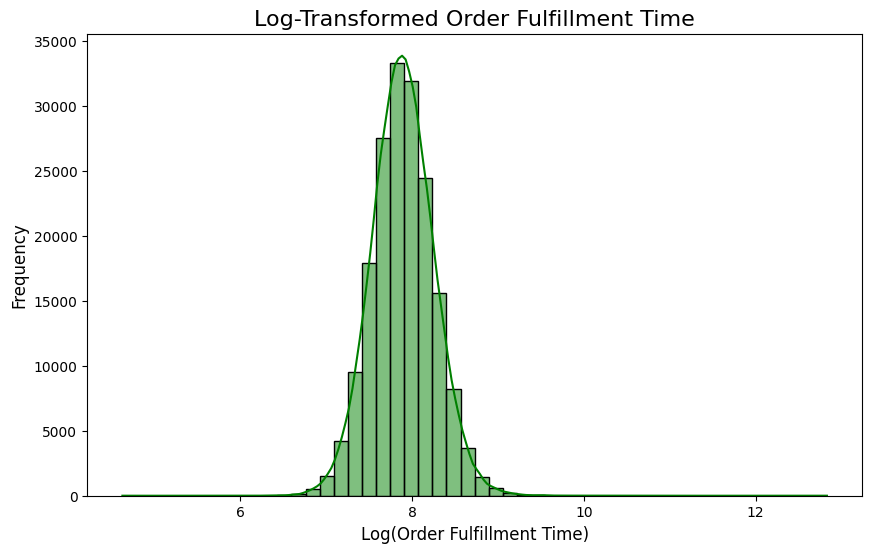

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['order_fulfillment_time'], kde=True, bins=50, color='blue')
plt.title("Distribution of Order Fulfillment Time", fontsize=16)
plt.xlabel("Order Fulfillment Time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

#summary statistics
target_stats = cleaned_data['order_fulfillment_time'].describe()
print("Summary Statistics for Order Fulfillment Time:")
print(target_stats)

#check skewness
from scipy.stats import skew

skewness = skew(cleaned_data['order_fulfillment_time'].dropna())

print(f"\nSkewness: {skewness}")

#log transformation
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(cleaned_data['order_fulfillment_time']), kde=True, bins=50, color='green')
plt.title("Log-Transformed Order Fulfillment Time", fontsize=16)
plt.xlabel("Log(Order Fulfillment Time)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


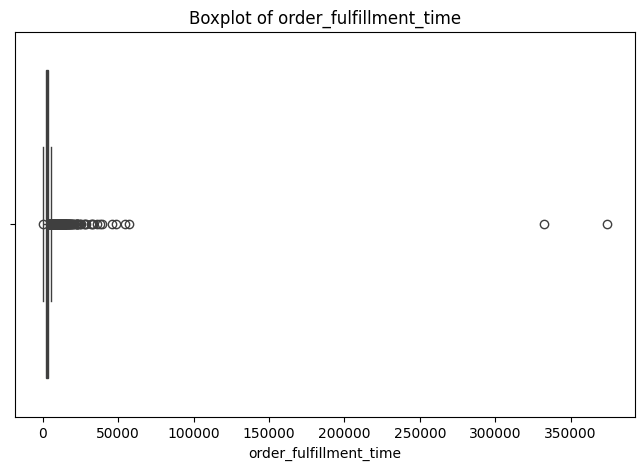

count    180948.000000
mean       2866.307990
std        1648.029276
min         101.000000
25%        2105.000000
50%        2662.000000
75%        3383.000000
max      373879.000000
Name: order_fulfillment_time, dtype: float64


<Figure size 800x500 with 0 Axes>

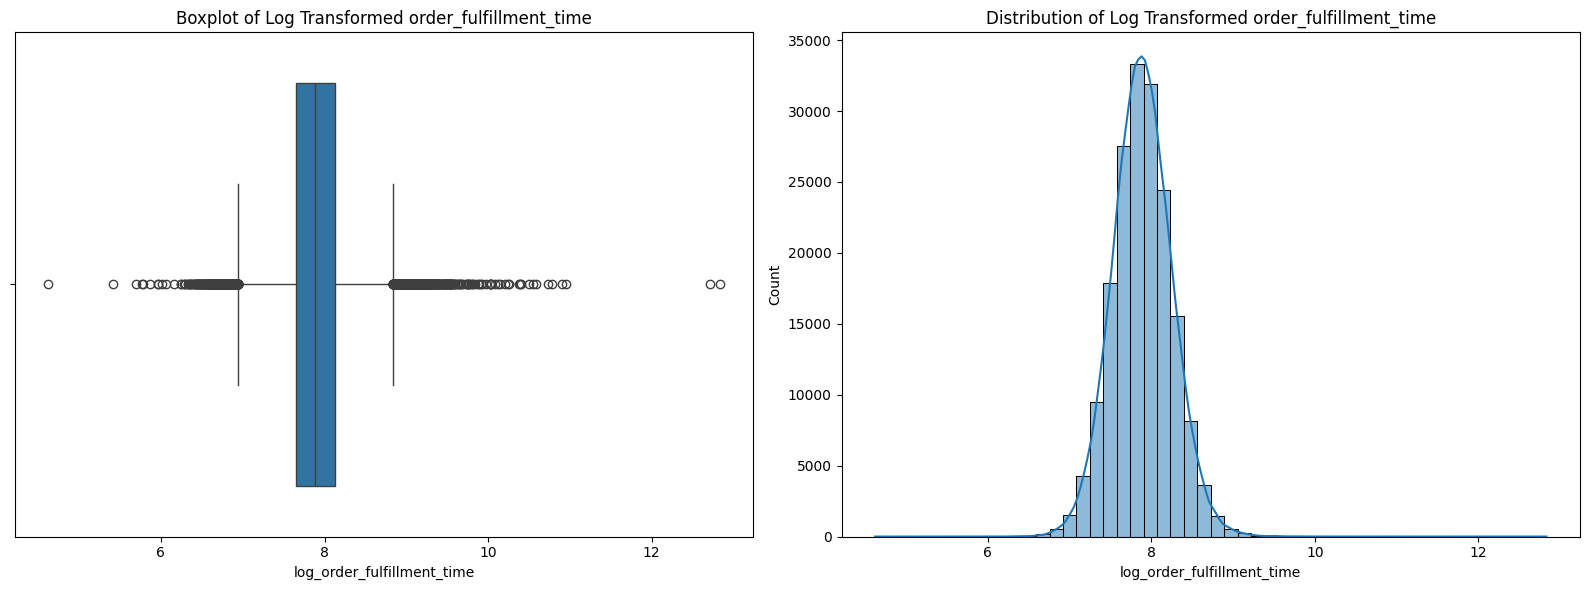

count    180948.000000
mean          7.892327
std           0.363246
min           4.624973
25%           7.652546
50%           7.887209
75%           8.126814
max          12.831690
Name: log_order_fulfillment_time, dtype: float64


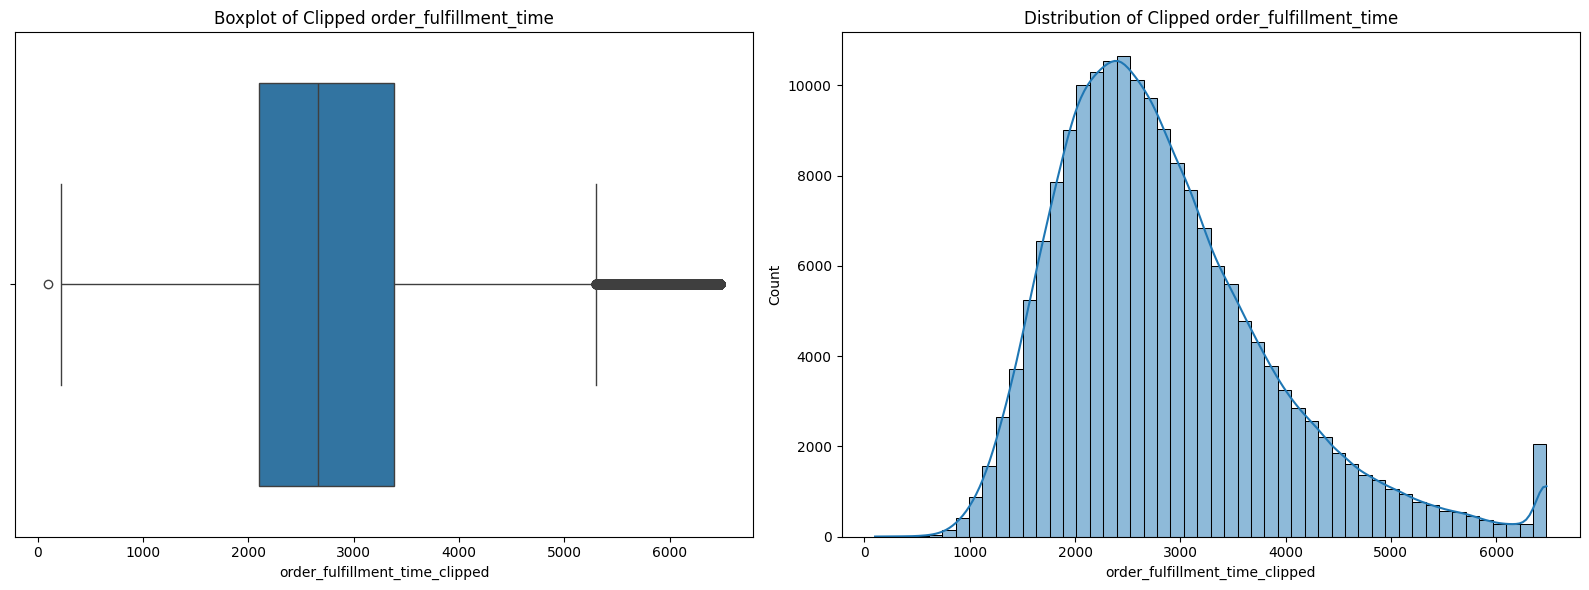

count    180948.000000
mean       2845.438150
std        1042.647236
min         101.000000
25%        2105.000000
50%        2662.000000
75%        3383.000000
max        6477.530000
Name: order_fulfillment_time_clipped, dtype: float64


In [ ]:
numeric_columns = [
    'busy_dashers_ratio','total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration',
    'subtotal_per_item'
]

cleaned_data['log_order_fulfillment_time'] = np.log1p(cleaned_data['order_fulfillment_time'])

### Log transform all predictors ###
#for col in numeric_columns:
#    cleaned_data[f'log_{col}'] = np.log1p(cleaned_data[col])
#log_transformed_data = np.log1p(cleaned_data[numeric_columns])

cleaned_data = cleaned_data.reset_index(drop=True)

#list of predictors to visualize


columns_to_check = ['order_fulfillment_time']
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
print(cleaned_data['order_fulfillment_time'].describe())

clipped_oft = f"order_fulfillment_time_clipped"
cleaned_data[clipped_oft] = cleaned_data['order_fulfillment_time'].clip(upper=cleaned_data['order_fulfillment_time'].quantile(0.99))

### BOXPLOT & DISTRIBUTION OF LOG OFT
plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a 1x2 grid
sns.boxplot(x=cleaned_data['log_order_fulfillment_time'], ax=axes[0])
axes[0].set_title("Boxplot of Log Transformed order_fulfillment_time")

sns.histplot(cleaned_data['log_order_fulfillment_time'], kde=True, ax=axes[1], bins=50)
axes[1].set_title("Distribution of Log Transformed order_fulfillment_time")
plt.tight_layout()
plt.show()
print(cleaned_data['log_order_fulfillment_time'].describe())

### BOXPLOT & DISTRIBUTION OF CLIPPED OFT
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a 1x2 grid
sns.boxplot(x=cleaned_data['order_fulfillment_time_clipped'], ax=axes[0])
axes[0].set_title("Boxplot of Clipped order_fulfillment_time")

sns.histplot(cleaned_data['order_fulfillment_time_clipped'], kde=True, ax=axes[1], bins=50)
axes[1].set_title("Distribution of Clipped order_fulfillment_time")

plt.tight_layout()
plt.show()

print(cleaned_data['order_fulfillment_time_clipped'].describe())

In [ ]:
### Add clipped version into cleaned data

percentile_99 = cleaned_data[numeric_columns].quantile(0.99)

for column in numeric_columns:
    clipped_col = f"{column}_clipped"
    cleaned_data[clipped_col] = cleaned_data[column].clip(upper=percentile_99[column])

print(cleaned_data.describe())

           market_id           actual_delivery_time       store_id  \
count  180029.000000                         180941  180948.000000   
mean        2.748902  2015-02-04 20:20:05.812895232    3545.234614   
min         1.000000            2015-01-21 15:58:11       1.000000   
25%         2.000000            2015-01-29 02:25:06    1686.000000   
50%         2.000000            2015-02-05 03:30:19    3614.000000   
75%         4.000000            2015-02-12 01:31:05    5323.000000   
max         6.000000            2015-02-19 22:45:31    6987.000000   
std         1.331675                            NaN    2058.067461   

       order_protocol    total_items       subtotal  num_distinct_items  \
count   180032.000000  180948.000000  180948.000000       180948.000000   
mean         2.896302       3.208032    2701.038016            2.677692   
min          1.000000       1.000000      12.000000            1.000000   
25%          1.000000       2.000000    1420.000000            2.0000

In [ ]:
### State variables for modeling
numeric_columns = [
    'busy_dashers_ratio','total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration',
    'subtotal_per_item'
]

clipped_numeric_columns = [
    'busy_dashers_ratio_clipped', 'total_onshift_dashers_clipped', 'total_busy_dashers_clipped',
    'total_outstanding_orders_clipped', 'subtotal_clipped', 'num_distinct_items_clipped',
    'min_item_price_clipped', 'max_item_price_clipped', 'estimated_order_place_duration_clipped',
    'estimated_store_to_consumer_driving_duration_clipped', 'subtotal_per_item_clipped'
]

data = cleaned_data[numeric_columns]
clipped_data = cleaned_data[clipped_numeric_columns]
X = data
X_clipped = clipped_data
y = np.log1p(cleaned_data['order_fulfillment_time_clipped'])

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import numpy as np

numeric_columns = [
    'busy_dashers_ratio', 'total_outstanding_orders',
    'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration'
]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=10)
scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Mean CV RMSE:", np.sqrt(-scores.mean()))

knn_model.fit(X_train, y_train)

y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

